# Displays the Frequent Colors Found
### Uses:
- Display the colors found in legend and cells

Top 6 most frequent colors and their counts:
Color: [255 255 255], Count: 738540
Color: [110 165 222], Count: 156194
Color: [117 221 255], Count: 87421
Color: [ 97  55 156], Count: 78927
Color: [ 91   0 124], Count: 51317
Color: [104 110 189], Count: 50867


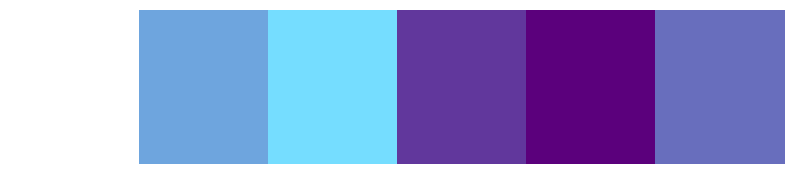

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Replace with your image path
image_path = 'D:\\thesis-tool\\generated-heatmaps\\Absence_of_corruption_Index__IDEA_.png'
image = Image.open(image_path)
image = image.convert('RGB')  # Ensure image is in RGB format
image_array = np.array(image)

# Reshape the array to a 2D array where each row is a color
pixels = image_array.reshape(-1, image_array.shape[-1])

# Find unique colors and their counts
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Sort the unique colors by their counts in descending order
sorted_indices = np.argsort(-counts)
top_colors = unique_colors[sorted_indices][:6]
top_counts = counts[sorted_indices][:6]

# Display the top 6 most frequent colors and their counts
print("Top 6 most frequent colors and their counts:")
for color, count in zip(top_colors, top_counts):
    print(f"Color: {color}, Count: {count}")

# Optionally, display the top 6 most frequent colors
plt.figure(figsize=(10, 2))
plt.imshow([top_colors], aspect='auto')
plt.axis('off')
plt.show()

## Contour Detection for Grid heatmap cells region

In [36]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")
            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box in green

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1051, y: 332, width: 26, height: 154
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 345, width: 27, height: 129
Drawing bounding box for largest contour at x: 396, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour at x: 1042, y: 332, width: 27, height: 154
Drawing bounding box for largest contour at x: 403, y: 110, width: 568, height: 795
Drawing bounding box for specific size contour

## Removing the Detected Regions

### Uses:
- Removes the graphical content such as the grid cells and color legend to cleanly extract the text in the grid heatmap cells

In [49]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1051, y: 332, width: 26, height: 154
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 404, y: 110, width: 568, height: 795
Removing specific size contour at x: 1042, y: 345, width: 27, height: 129
Removing specific size contour at x: 404, y: 110, width: 568, height: 795
Drawing bounding box for largest contour at x: 396, y: 110, width: 568, 

In [54]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
image_path = 'D:\\thesis-tool\\filtered-contours\\Absence_of_corruption_Index__IDEA_.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Tesseract to detect orientation and script
osd = pytesseract.image_to_osd(gray, output_type=Output.DICT)
rotation = osd['rotate']

# Rotate the image to the correct orientation
if rotation != 0:
    (h, w) = gray.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, -rotation, 1.0)
    rotated = cv2.warpAffine(gray, M, (w, h))
else:
    rotated = gray

# Extract text from the correctly oriented image
text = pytesseract.image_to_string(rotated)

print("Extracted Text:")
print(text)

Extracted Text:
Absence of corruption Index
(IDEA)

Iran, Islamic Republic of
Azerbaijan

Iraq

Congo

Ireland
Size
Uruguay 64 to 78
51 to 64
38 to 51
Cyprus 24 to 38

; 11 to 24
Romania NaN

Somalia

Liberia

United Arab Emirates
Armenia

Angola

Malawi

Libya

Tunisia

Bosnia and Herzegovina
Gabon

Italy

1975.1984
1985.1994
1995.2003
2004.2012
2013.2021



## Extracting Y-Axis Label from the Removed Contour Images
#### Uses:
- Extracts the texts from the region of interest
- `Note: The varying position of images sometimes include the labels in x-axis, see the instances below`

#### Next step:
- Remove integers extracted from the region of interest to include only the countries or the strings

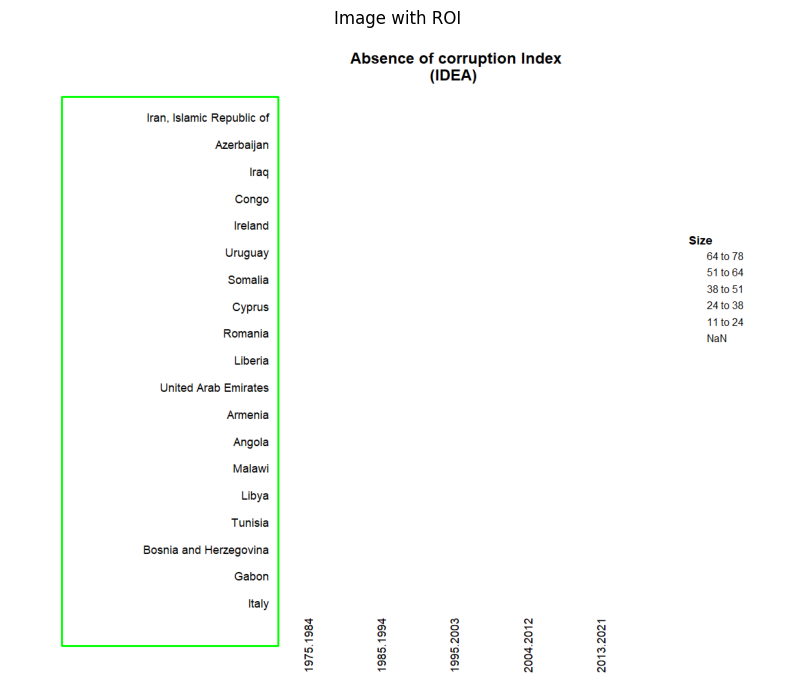

Extracted Text from ROI:
Iran, Islamic Republic of
Azerbaijan

Iraq

Congo

Ireland

Uruguay

Somalia

Cyprus

Romania

Liberia

United Arab Emirates
Armenia

Angola

Malawi

Libya

Tunisia

Bosnia and Herzegovina
Gabon

Italy




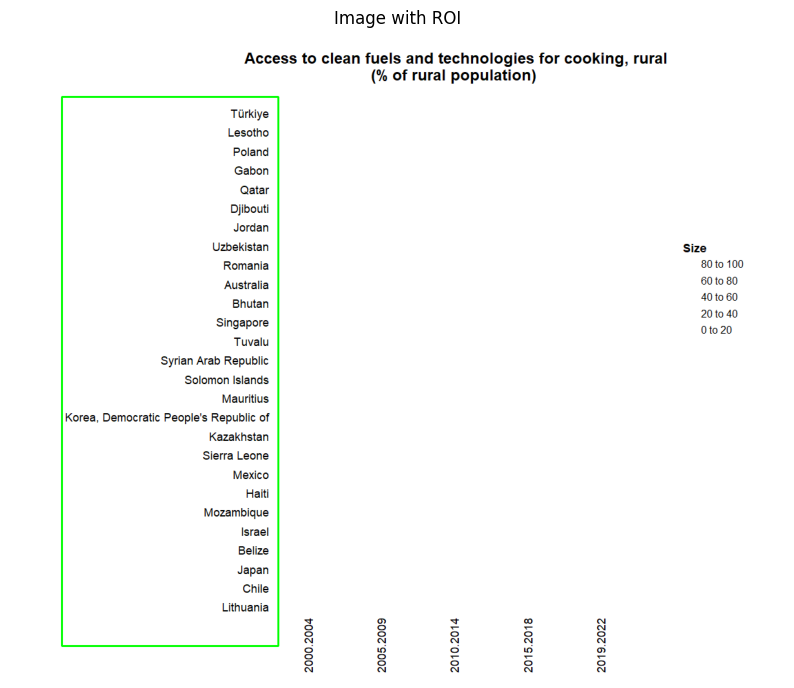

Extracted Text from ROI:
Turkiye

Lesotho

Poland

Gabon

Qatar

Djibouti

Jordan
Uzbekistan
Romania
Australia
Bhutan
Singapore
Tuvalu

Syrian Arab Republic
Solomon Islands
Mauritius

Korea, Democratic People's Republic of
Kazakhstan
Sierra Leone
Mexico

Haiti
Mozambique
Israel

Belize

Japan

Chile

Lithuania




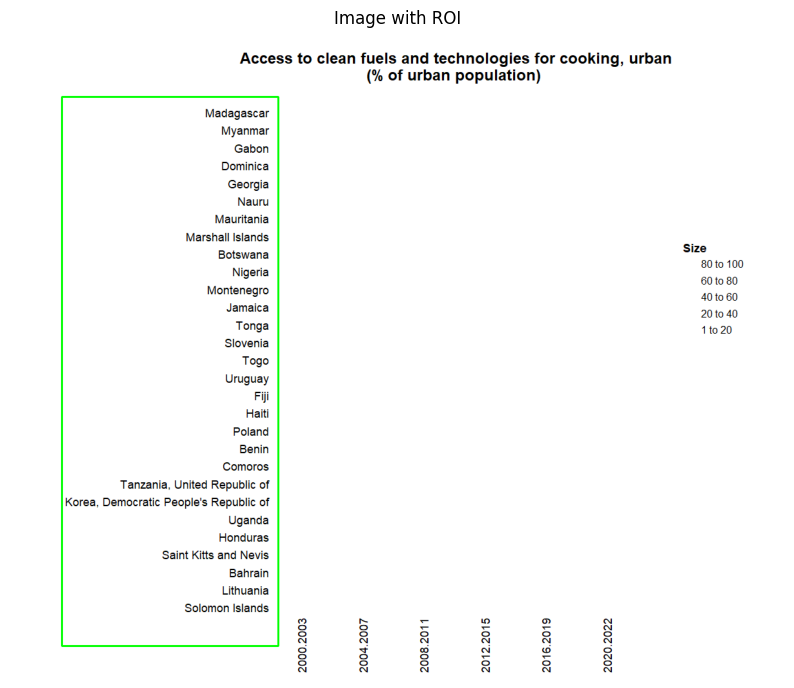

Extracted Text from ROI:
Madagascar
Myanmar

Gabon

Dominica

Georgia

Nauru

Mauritania

Marshall Islands
Botswana

Nigeria

Montenegro
Jamaica

Tonga

Slovenia

Togo

Uruguay

Fiji

Haiti

Poland

Benin

Comoros

Tanzania, United Republic of
Korea, Democratic People's Republic of
Uganda

Honduras

Saint Kitts and Nevis
Bahrain

Lithuania

Solomon Islands




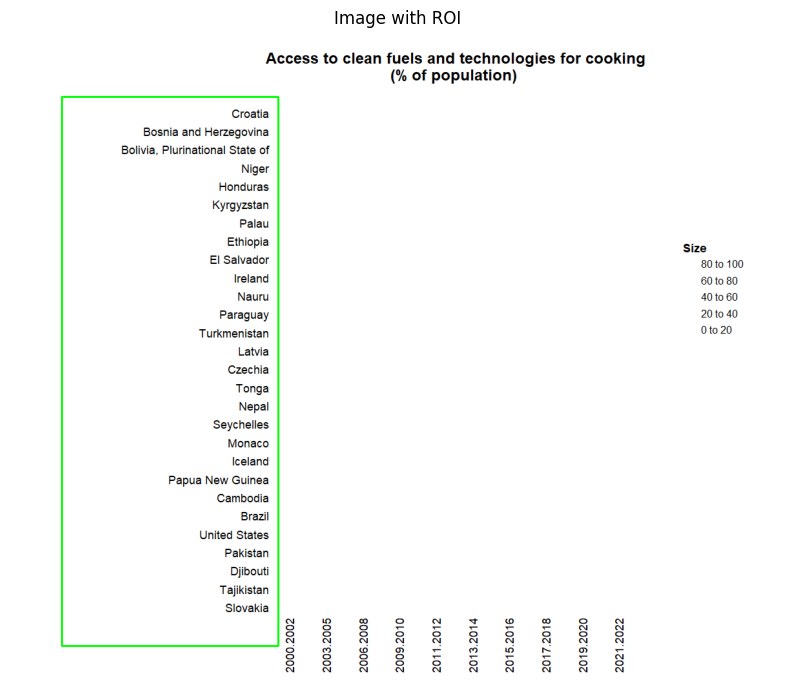

Extracted Text from ROI:
Croatia

Bosnia and Herzegovina
Bolivia, Plurinational State of
Niger

Honduras
Kyrgyzstan

Palau

Ethiopia

El Salvador

Ireland

Nauru

Paraguay
Turkmenistan
Latvia

Czechia

Tonga

Nepal

Seychelles
Monaco

Iceland

Papua New Guinea
Cambodia

Brazil

United States
Pakistan

Djibouti

Tajikistan

Slovakia




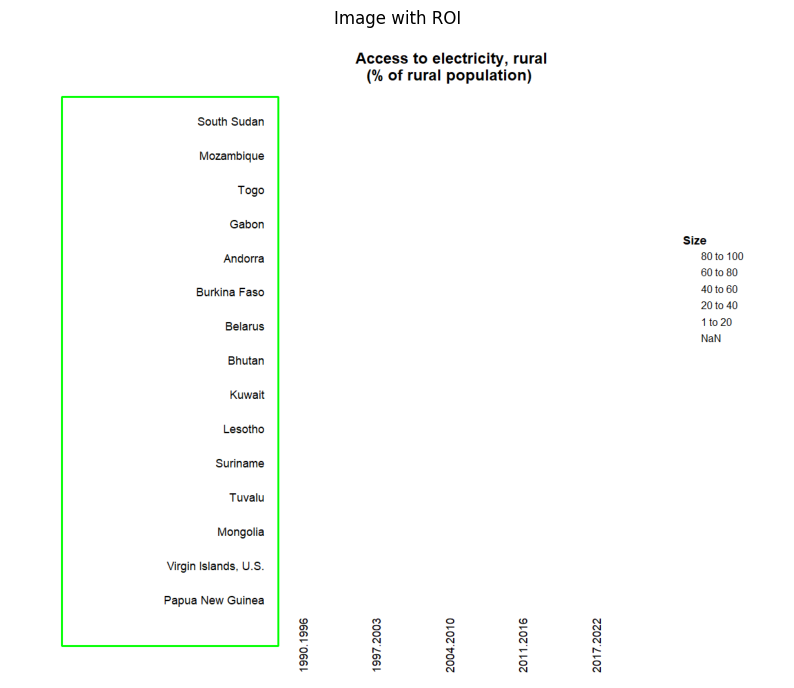

Extracted Text from ROI:
South Sudan

Mozambique

Togo

Gabon

Andorra

Burkina Faso

Belarus

Bhutan

Kuwait

Lesotho

Suriname

Tuvalu

Mongolia

Virgin Islands, U.S.

Papua New Guinea




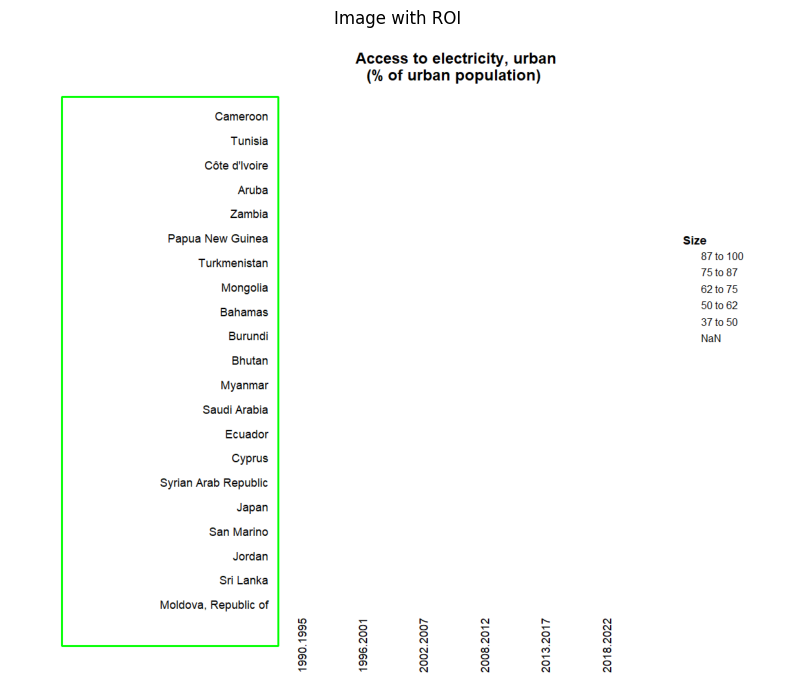

Extracted Text from ROI:
Cameroon

Tunisia

Céte d'ivoire

Aruba

Zambia

Papua New Guinea
Turkmenistan
Mongolia

Bahamas

Burundi

Bhutan

Myanmar

Saudi Arabia
Ecuador

Cyprus

Syrian Arab Republic
Japan

San Marino

Jordan

Sri Lanka

Moldova, Republic of




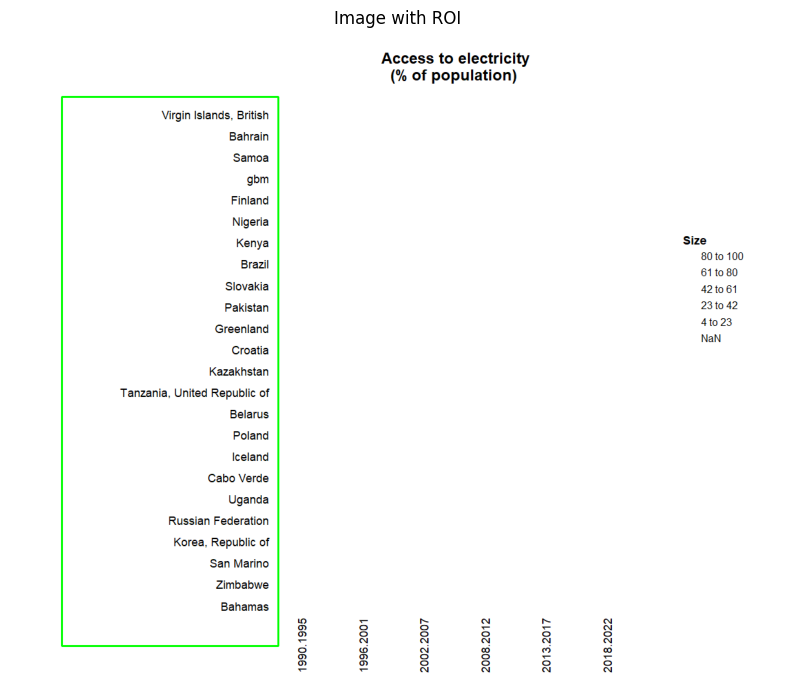

Extracted Text from ROI:
Virgin Islands, British
Bahrain

Samoa

gbm

Finland

Nigeria

Kenya

Brazil

Slovakia

Pakistan
Greenland

Croatia
Kazakhstan
Tanzania, United Republic of
Belarus

Poland

Iceland

Cabo Verde
Uganda

Russian Federation
Korea, Republic of
San Marino
Zimbabwe

Bahamas




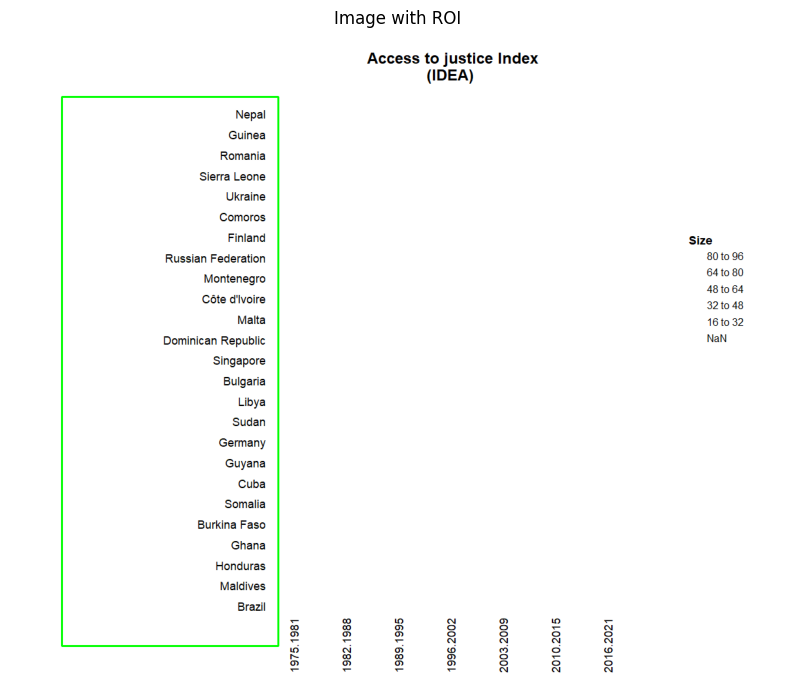

Extracted Text from ROI:
Nepal
Guinea
Romania
Sierra Leone
Ukraine
Comoros
Finland
Russian Federation
Montenegro
Céte d'ivoire
Malta
Dominican Republic
Singapore
Bulgaria
Libya

Sudan
Germany
Guyana
Cuba
Somalia
Burkina Faso
Ghana
Honduras
Maldives
Brazil




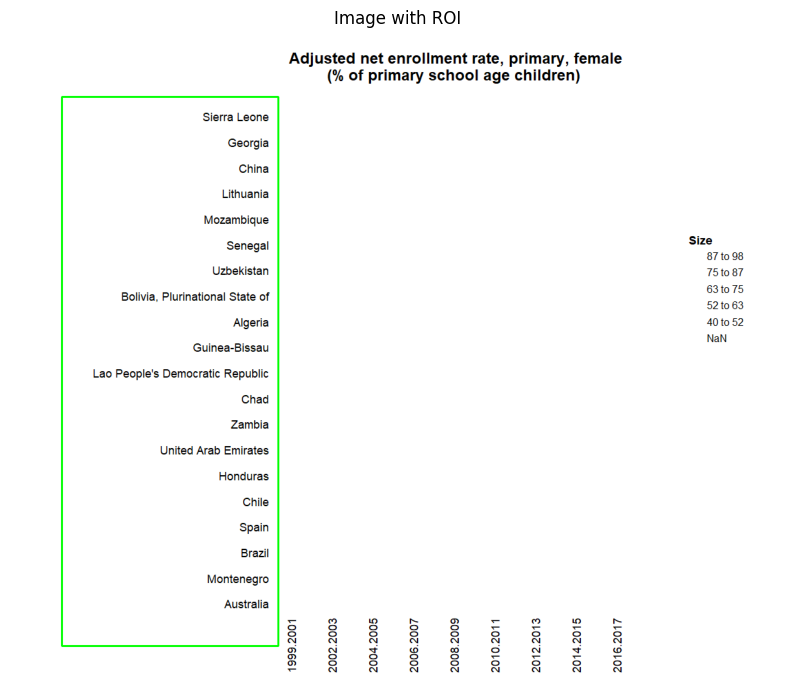

Extracted Text from ROI:
Sierra Leone

Georgia

China

Lithuania

Mozambique

Senegal

Uzbekistan

Bolivia, Plurinational State of
Algeria

Guinea-Bissau

Lao People's Democratic Republic
Chad

Zambia

United Arab Emirates
Honduras

Chile

Spain

Brazil

Montenegro

Australia




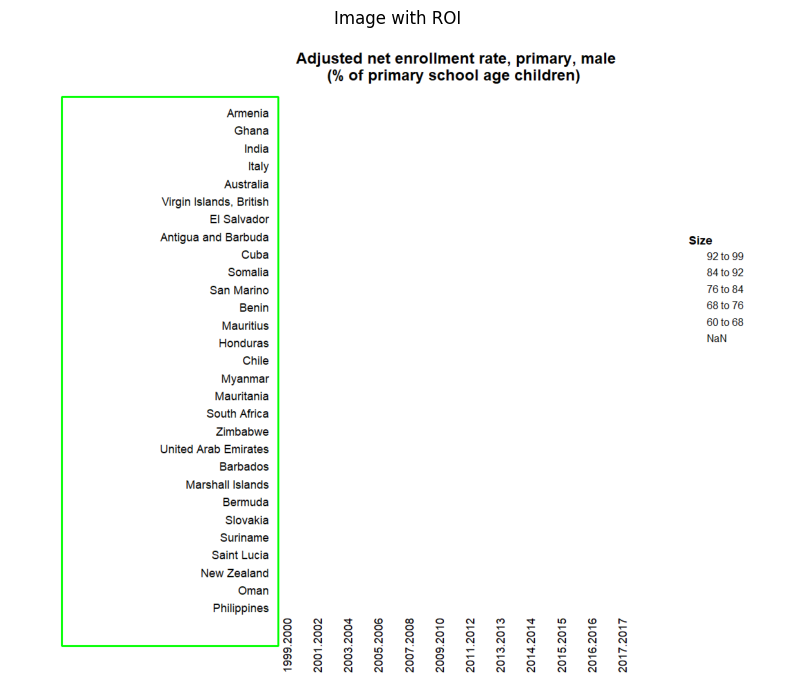

Extracted Text from ROI:
Armenia

Ghana

India

Italy

Australia

Virgin Islands, British
El Salvador

Antigua and Barbuda
Cuba

Somalia

San Marino

Benin

Mauritius

Honduras

Chile

Myanmar

Mauritania

South Africa
Zimbabwe

United Arab Emirates
Barbados

Marshall Islands
Bermuda

Slovakia

Suriname

Saint Lucia

New Zealand

Oman

Philippines




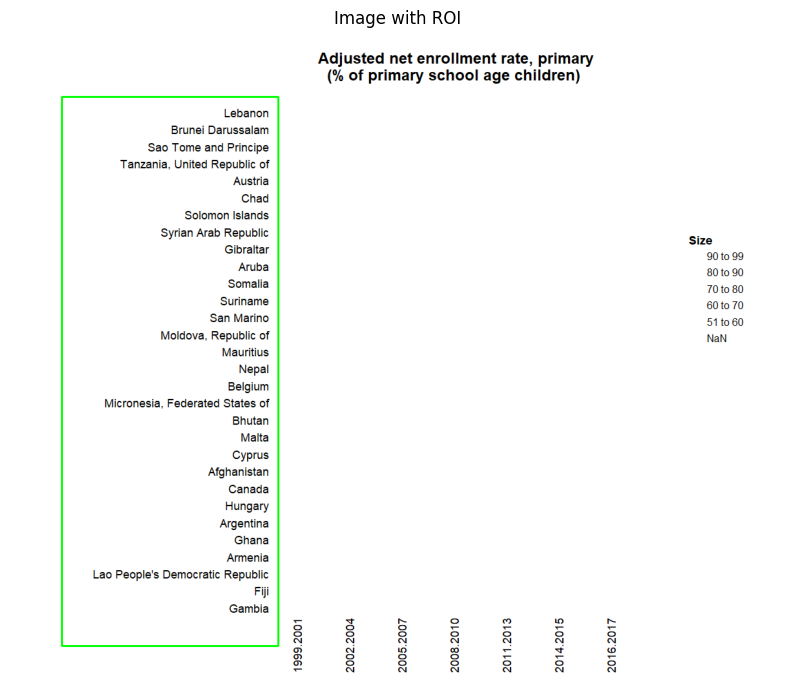

Extracted Text from ROI:
Lebanon

Brunei Darussalam

Sao Tome and Principe
Tanzania, United Republic of
Austria

Chad

Solomon Islands

Syrian Arab Republic
Gibraltar

Aruba

Somalia

Suriname

San Marino

Moldova, Republic of
Mauritius

Nepal

Belgium

Micronesia, Federated States of
Bhutan

Malta

Cyprus

Afghanistan

Canada

Hungary

Argentina

Ghana

Armenia

Lao People's Democratic Republic
Fiji

Gambia




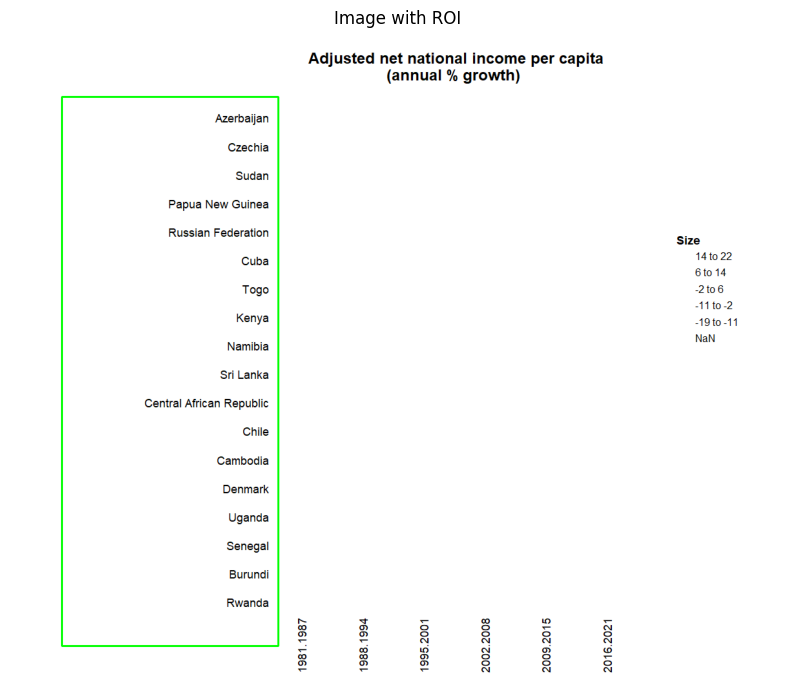

Extracted Text from ROI:
Azerbaijan

Czechia

Sudan

Papua New Guinea
Russian Federation
Cuba

Togo

Kenya

Namibia

Sri Lanka

Central African Republic
Chile

Cambodia
Denmark

Uganda

Senegal

Burundi

Rwanda




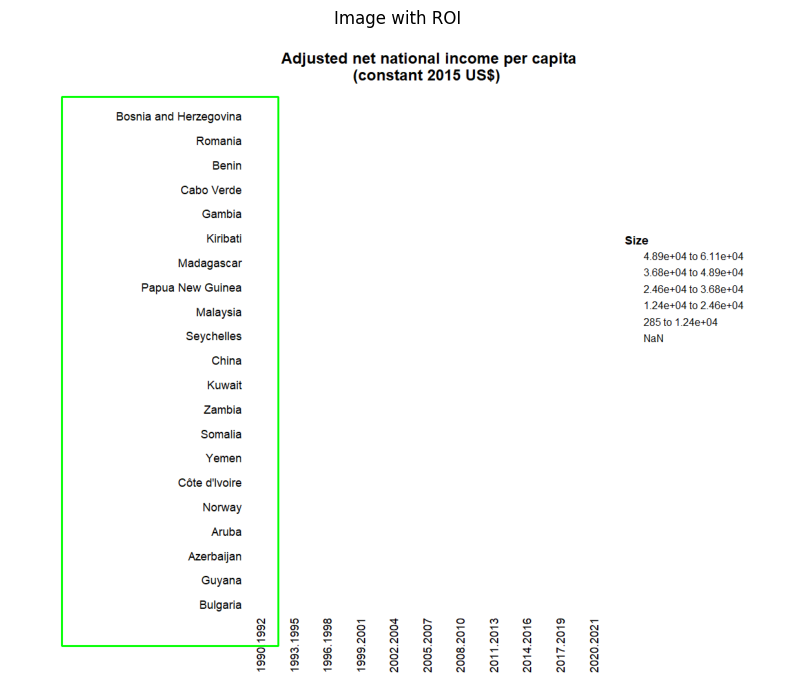

Extracted Text from ROI:
Bosnia and Herzegovina
Romania

Benin

Cabo Verde
Gambia

Kiribati
Madagascar
Papua New Guinea
Malaysia
Seychelles

China

Kuwait

Zambia

Somalia

Yemen

Céte d'ivoire
Norway

Aruba

Azerbaijan

Guyana

Bulgaria

1992




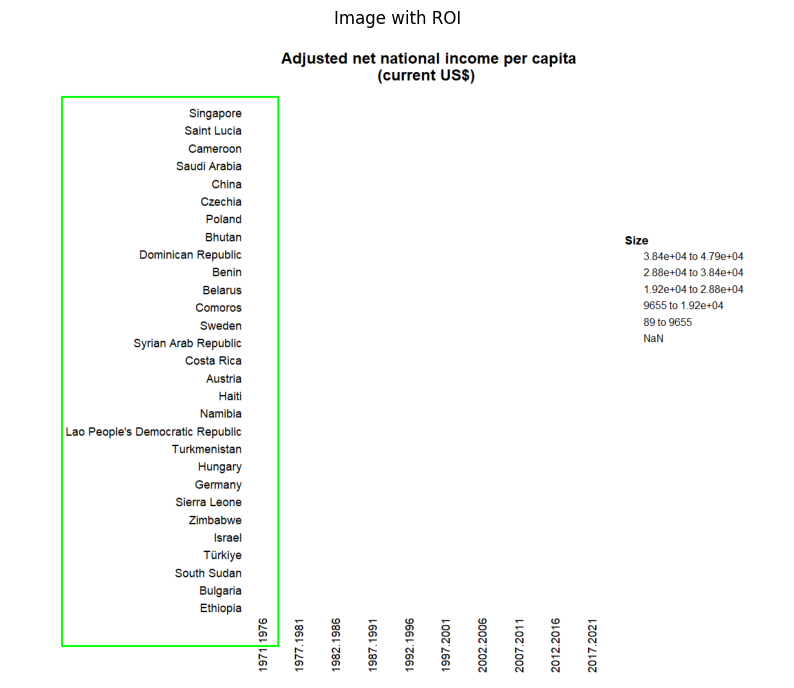

Extracted Text from ROI:
Singapore

Saint Lucia
Cameroon

Saudi Arabia

China

Czechia

Poland

Bhutan

Dominican Republic
Benin

Belarus

Comoros

Sweden

Syrian Arab Republic
Costa Rica

Austria

Haiti

Namibia

Lao People's Democratic Republic
Turkmenistan
Hungary

Germany

Sierra Leone
Zimbabwe

Israel

Turkiye

South Sudan
Bulgaria

Ethiopia

1976




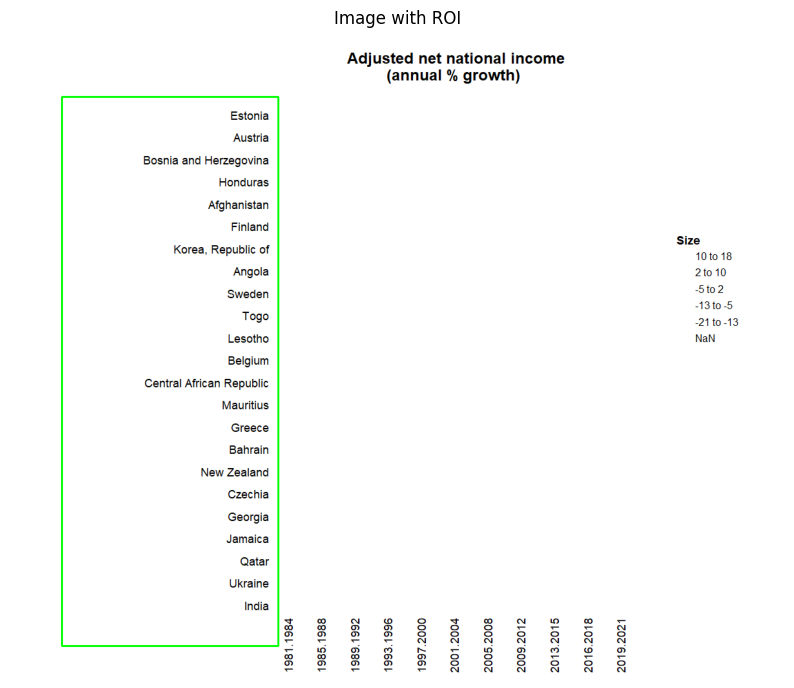

Extracted Text from ROI:
Estonia

Austria

Bosnia and Herzegovina
Honduras
Afghanistan
Finland

Korea, Republic of
Angola

Sweden

Togo

Lesotho

Belgium

Central African Republic
Mauritius

Greece

Bahrain

New Zealand
Czechia

Georgia

Jamaica

Qatar

Ukraine

India




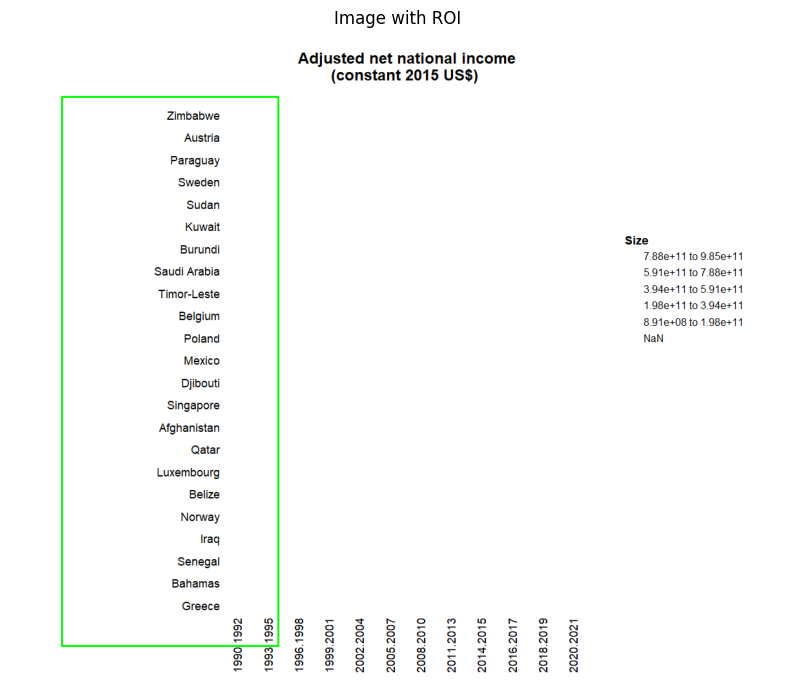

Extracted Text from ROI:
Zimbabwe
Austria
Paraguay
Sweden
Sudan
Kuwait
Burundi
Saudi Arabia
Timor-Leste
Belgium
Poland
Mexico
Djibouti
Singapore
Afghanistan
Qatar
Luxembourg
Belize
Norway

Iraq
Senegal
Bahamas

Greece

1992

1995




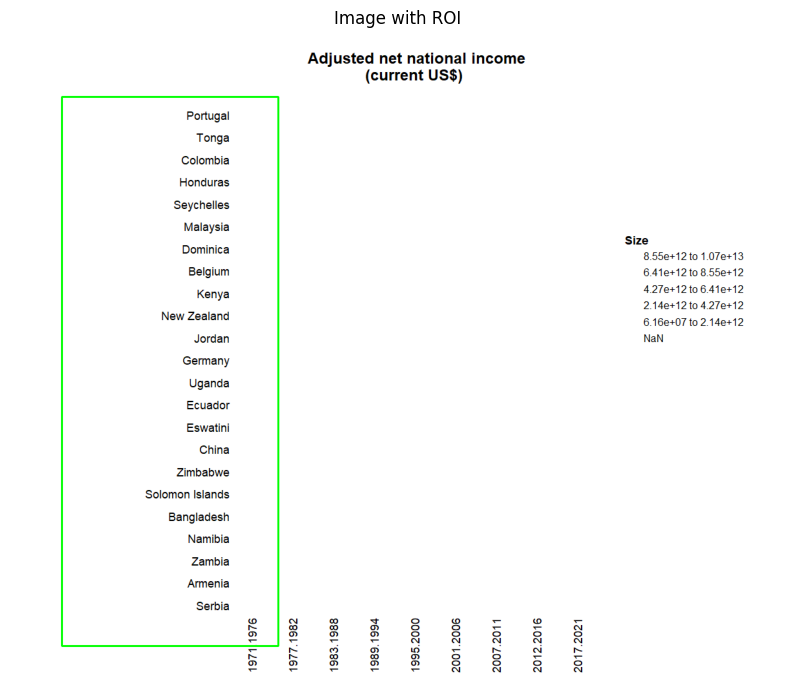

Extracted Text from ROI:
Portugal
Tonga
Colombia
Honduras
Seychelles
Malaysia
Dominica
Belgium
Kenya

New Zealand
Jordan
Germany
Uganda
Ecuador
Eswatini
China
Zimbabwe
Solomon Islands
Bangladesh
Namibia
Zambia
Armenia

Serbia

1976




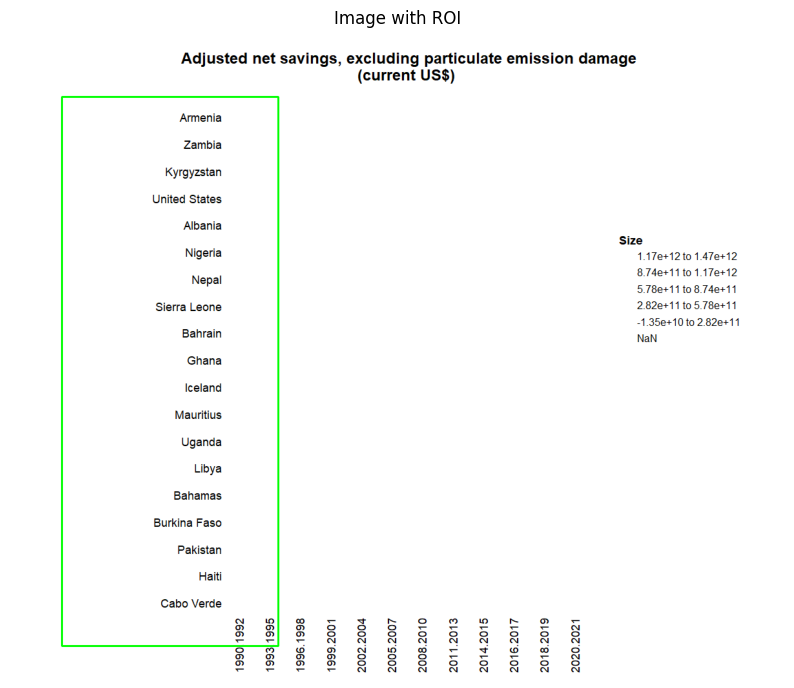

Extracted Text from ROI:
Armenia
Zambia
Kyrgyzstan
United States
Albania
Nigeria
Nepal

Sierra Leone
Bahrain
Ghana
Iceland
Mauritius
Uganda
Libya
Bahamas
Burkina Faso
Pakistan
Haiti

Cabo Verde

1992

1995




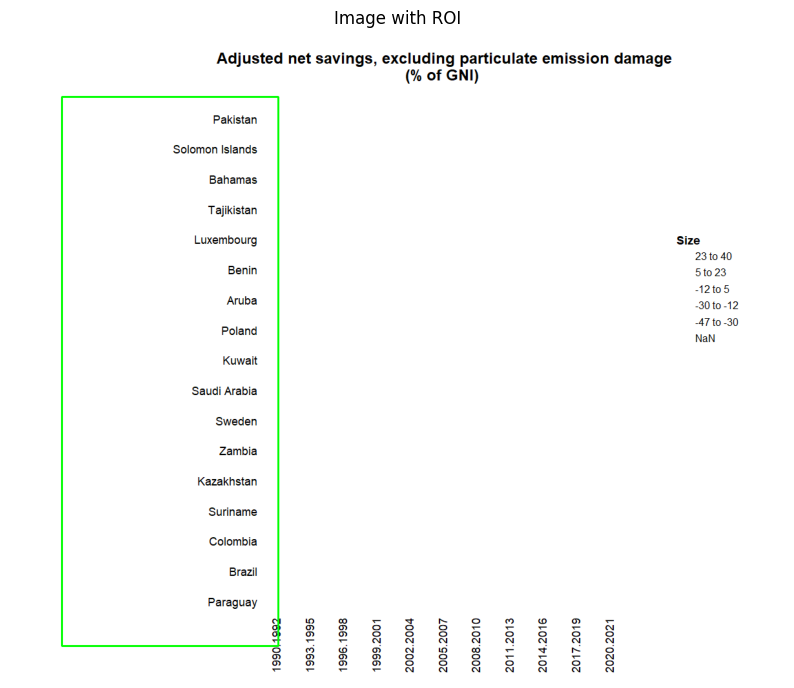

Extracted Text from ROI:
Pakistan
Solomon Islands
Bahamas
Tajikistan
Luxembourg
Benin

Aruba
Poland
Kuwait
Saudi Arabia
Sweden
Zambia
Kazakhstan
Suriname
Colombia
Brazil

Paraguay

Peel




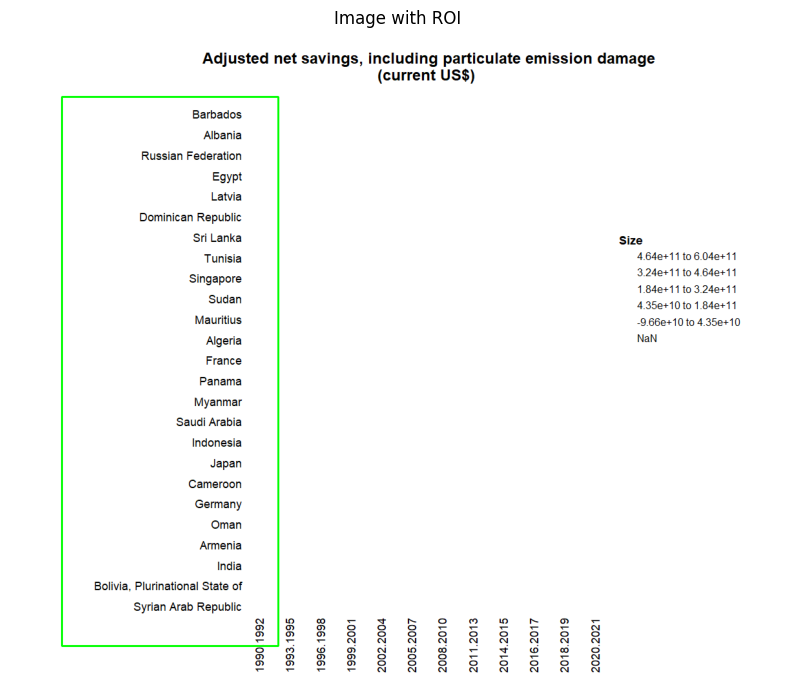

Extracted Text from ROI:
Barbados

Albania

Russian Federation
Egypt

Latvia

Dominican Republic
Sri Lanka

Tunisia

Singapore

Sudan

Mauritius

Algeria

France

Panama

Myanmar

Saudi Arabia
Indonesia

Japan

Cameroon
Germany

Oman

Armenia

India

Bolivia, Plurinational State of
Syrian Arab Republic

1992




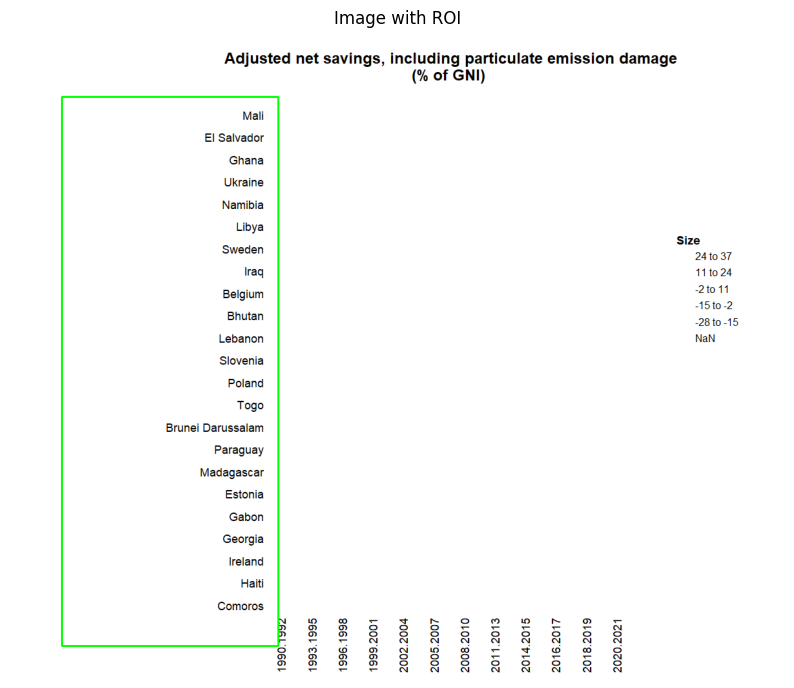

Extracted Text from ROI:
Mali

El Salvador
Ghana
Ukraine
Namibia
Libya
Sweden
Iraq
Belgium
Bhutan
Lebanon
Slovenia
Poland
Togo
Brunei Darussalam
Paraguay
Madagascar
Estonia
Gabon
Georgia
Ireland
Haiti

Comoros




In [13]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\thesis-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (80, 100, 335, 850)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the cropped region
        text = pytesseract.image_to_string(gray_cropped)

        print("Extracted Text from ROI:")
        print(text)